In [51]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
with open("../clinical_data.json", 'r') as file:
    clinical_data = json.load(file)

clinical_data = clinical_data['kf_exams']
clinical_data = [exam for exam in clinical_data if (exam['patient']['ifr']!=None and exam['patient']["exclude"]!=1)]

In [53]:
df = pd.json_normalize(clinical_data)

In [54]:
df.head()

,id,path,key_frame.id,key_frame.identifiers,key_frame.path,key_frame.mask,patient.id,patient.sex,patient.age,patient.ifr,patient.ffr,patient.exclude
0,5,/media/jlsstorage/masstorage/angiograms/Videos...,27,780_29.8_24.6_27_0224_0077,/media/jlsstorage/masstorage/angiograms/Videos...,/media/jlsstorage/masstorage/angiograms/key_ma...,780,0.0,57.0,0.97,NaN,0.0
1,8,/media/jlsstorage/masstorage/angiograms/Videos...,38,774_29.8_-1.6_38_0328_0077,/media/jlsstorage/masstorage/angiograms/Videos...,/media/jlsstorage/masstorage/angiograms/key_ma...,774,0.0,77.0,0.77,NaN,0.0
2,5,/media/jlsstorage/masstorage/angiograms/Videos...,25,760_-1.9_-25.3_25_0614_0076,/media/jlsstorage/masstorage/angiograms/Videos...,/media/jlsstorage/masstorage/angiograms/key_ma...,760,0.0,66.0,0.94,NaN,0.0
3,8,/media/jlsstorage/masstorage/angiograms/Videos...,32,610_32_16_32_1520_0097,/media/jlsstorage/masstorage/angiograms/Videos...,/media/jlsstorage/masstorage/angiograms/key_ma...,610,1.0,58.0,0.94,NaN,0.0
4,9,/media/jlsstorage/masstorage/angiograms/Videos...,28,763_-32.8_4.2_28_0579_0064,/media/jlsstorage/masstorage/angiograms/Videos...,/media/jlsstorage/masstorage/angiograms/key_ma...,763,0.0,68.0,0.65,NaN,0.0


In [55]:
df["patient.id"].value_counts()

patient.id
611    11
609     9
608     9
623     8
761     8
       ..
598     1
665     1
412     1
646     1
365     1
Name: count, Length: 80, dtype: int64

In [56]:
len(df)

403

In [57]:
df.describe()

,key_frame.id,patient.id,patient.sex,patient.age,patient.ifr,patient.ffr,patient.exclude
count,403.000000,403.000000,403.000000,403.000000,403.000000,45.000000,403.000000
mean,31.277916,651.411911,0.240695,67.794045,0.889901,0.817333,0.029777
std,24.024701,113.202803,0.428037,9.937855,0.109133,0.061806,0.242513
min,10.000000,255.000000,0.000000,46.000000,0.490000,0.710000,0.000000
25%,24.000000,561.000000,0.000000,64.000000,0.870000,0.760000,0.000000
50%,30.000000,618.000000,0.000000,68.000000,0.920000,0.810000,0.000000
75%,35.000000,769.000000,0.000000,76.000000,0.940000,0.860000,0.000000
max,480.000000,790.000000,1.000000,88.000000,1.000000,0.920000,2.000000


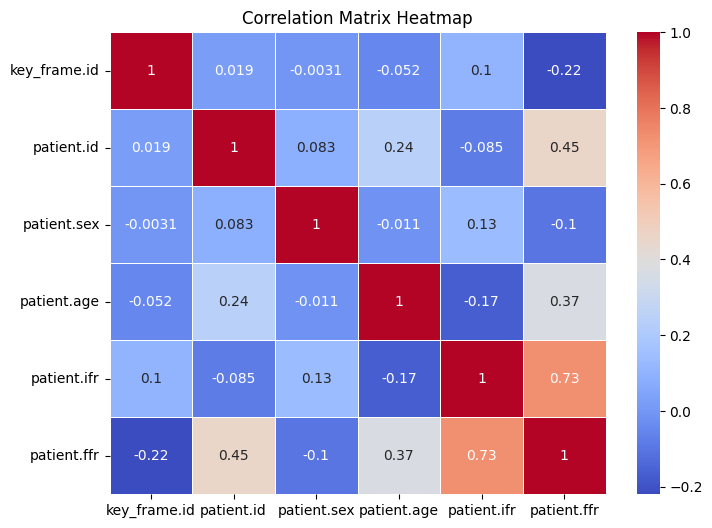

In [58]:
numeric_df = df.select_dtypes(include='number')
numeric_df = numeric_df.drop(columns=["patient.exclude"])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [59]:
sum(df["key_frame.id"]>45)

15

In [60]:
df = pd.read_excel("../clinical_data.xlsx")
df.head()

,Nr,Sexo,Idade,Data,Exclusao_0_Nao_1_Clinica_2_Imagem_3_ambos,Unnamed: 5,iFR_valor,FFR_valor,Obs_angio,Tratamento_modalidade,Nr_DUPLICADO,ANGIO_MISSING,PACS_S_N,Lesão (1-TC;2-DA;3-Cx;4-CD;5-RI;6-bypass),Excluir (0_nao_1_sim_2_talvez,Treino_Teste
0,250.0,0.0,57.0,2015-06-15 17:27:00,1,NaN,0.84,NaN,Reabita CTO Cx - iFR muito sobre-estimado,1.0,NaN,NaN,1.0,2.0,2.0,1.0
1,251.0,1.0,81.0,2015-06-22 12:31:00,NaN,NaN,0.92,0.89,NaN,0.0,NaN,NaN,1.0,2.0,0.0,0.0
2,252.0,0.0,51.0,2015-06-23 19:20:00,NaN,NaN,0.85,0.77,NaN,1.0,NaN,NaN,1.0,2.0,0.0,0.0
3,253.0,0.0,42.0,2015-06-25 10:30:00,NaN,NaN,0.89,0.78,NaN,1.0,NaN,NaN,1.0,2.0,0.0,0.0
4,254.0,0.0,68.0,2015-07-03 10:40:00,NaN,NaN,0.96,0.94,NaN,0.0,NaN,NaN,1.0,2.0,0.0,1.0


In [61]:
aliases = {
    "Sexo": "sex",
    "Idade": "age",
    "iFR_valor": "ifr",
    "FFR_valor": "ffr",
    "Nr": "id",
    "Excluir (0_nao_1_sim_2_talvez": "exclude"
    # "Tratamento_modalidade": "treatment_type",
    # "Lesão (1-TC;2-DA;3-Cx;4-CD;5-RI;6-bypass)": "lesion_loc",
}

In [62]:
df = df.rename(columns=aliases)[aliases.values()]
df.head()

,sex,age,ifr,ffr,id,exclude
0,0.0,57.0,0.84,NaN,250.0,2.0
1,1.0,81.0,0.92,0.89,251.0,0.0
2,0.0,51.0,0.85,0.77,252.0,0.0
3,0.0,42.0,0.89,0.78,253.0,0.0
4,0.0,68.0,0.96,0.94,254.0,0.0


In [63]:
df = df[df["exclude"]!=1]
df = df.drop_duplicates(subset='id', keep='last')
df.head()

,sex,age,ifr,ffr,id,exclude
0,0.0,57.0,0.84,NaN,250.0,2.0
1,1.0,81.0,0.92,0.89,251.0,0.0
2,0.0,51.0,0.85,0.77,252.0,0.0
3,0.0,42.0,0.89,0.78,253.0,0.0
4,0.0,68.0,0.96,0.94,254.0,0.0


In [64]:
out_df = df[(df["ifr"] > 1) | (df["ifr"] < 0) | (df["ifr"] < 0) | (df["ifr"].isna())]

In [65]:
out_df.head()

,sex,age,ifr,ffr,id,exclude
13,1.0,87.0,NaN,0.85,262.0,0.0
14,1.0,74.0,NaN,0.84,263.0,0.0
15,1.0,57.0,NaN,0.87,264.0,0.0
16,1.0,68.0,1.02,0.90,265.0,0.0
18,0.0,58.0,NaN,0.75,267.0,0.0


In [66]:
in_df =df[(df["ifr"] <= 1) & (df["ifr"] >= 0)]

In [67]:
df.describe()

,sex,age,ifr,ffr,id,exclude
count,518.000000,518.000000,454.000000,173.000000,518.000000,518.000000
mean,0.297297,67.133205,2.158304,2.033237,521.096525,0.131274
std,0.457510,11.218751,27.179584,16.132943,156.715188,0.495772
min,0.000000,38.000000,0.340000,0.550000,250.000000,0.000000
25%,0.000000,58.000000,0.860000,0.760000,386.250000,0.000000
50%,0.000000,68.000000,0.910000,0.810000,523.500000,0.000000
75%,1.000000,76.000000,0.960000,0.860000,655.750000,0.000000
max,1.000000,91.000000,580.000000,213.000000,791.000000,2.000000


In [68]:
in_df.describe()

,sex,age,ifr,ffr,id,exclude
count,452.000000,452.000000,452.000000,107.000000,452.000000,452.000000
mean,0.285398,67.725664,0.882412,0.799252,531.028761,0.137168
std,0.452104,11.079833,0.119645,0.064453,151.281947,0.506051
min,0.000000,38.000000,0.340000,0.550000,250.000000,0.000000
25%,0.000000,60.000000,0.860000,0.760000,407.750000,0.000000
50%,0.000000,68.000000,0.910000,0.810000,537.500000,0.000000
75%,1.000000,77.000000,0.960000,0.840000,658.250000,0.000000
max,1.000000,91.000000,1.000000,0.940000,791.000000,2.000000


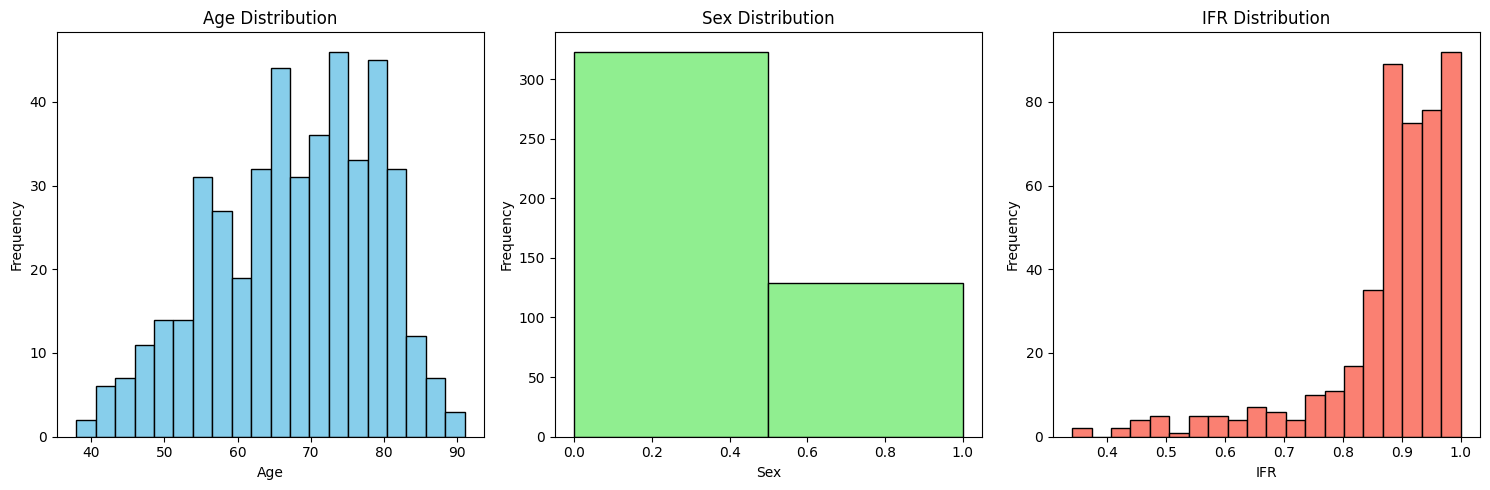

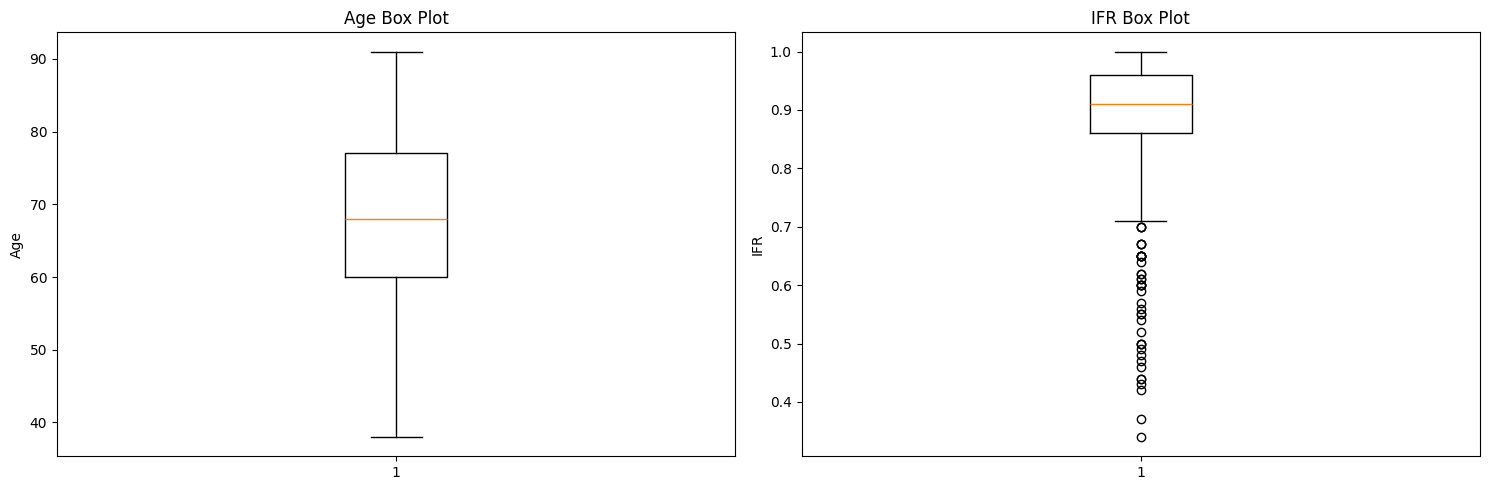

In [69]:
import matplotlib.pyplot as plt

# Histograms
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(in_df['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(in_df['sex'], bins=2, color='lightgreen', edgecolor='black')
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(in_df['ifr'], bins=20, color='salmon', edgecolor='black')
plt.title('IFR Distribution')
plt.xlabel('IFR')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Box Plots
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.boxplot(in_df['age'].dropna())
plt.title('Age Box Plot')
plt.ylabel('Age')

# plt.subplot(1, 3, 2)
# plt.boxplot(in_df['sex'].dropna())
# plt.title('Sex Box Plot')
# plt.ylabel('Sex')

plt.subplot(1, 2, 2)
plt.boxplot(in_df['ifr'].dropna())
plt.title('IFR Box Plot')
plt.ylabel('IFR')

plt.tight_layout()
plt.show()

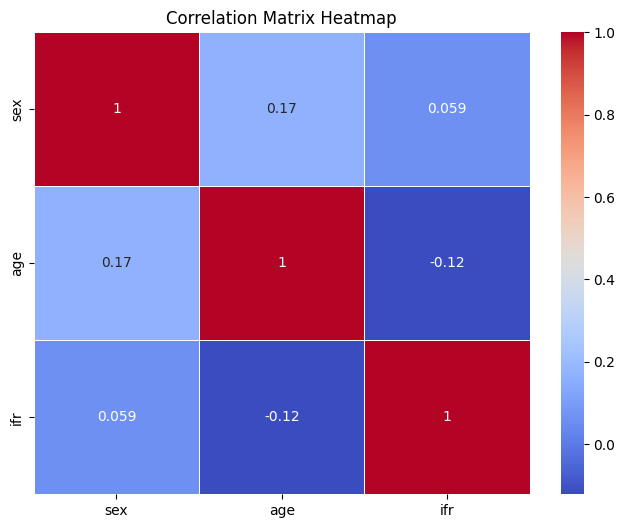

In [70]:
numeric_df = in_df.select_dtypes(include='number')
numeric_df = numeric_df.drop(columns=["exclude", "ffr", "id"])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [80]:
in_df["intervention"]=in_df["ifr"]<0.89

/tmp/ipykernel_331598/3421611819.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  in_df["intervention"]=in_df["ifr"]<0.89


In [87]:
in_df.head()

,sex,age,ifr,ffr,id,exclude,intervention
0,0.0,57.0,0.84,NaN,250.0,2.0,True
1,1.0,81.0,0.92,0.89,251.0,0.0,False
2,0.0,51.0,0.85,0.77,252.0,0.0,True
3,0.0,42.0,0.89,0.78,253.0,0.0,False
4,0.0,68.0,0.96,0.94,254.0,0.0,False


<Figure size 1500x500 with 0 Axes>

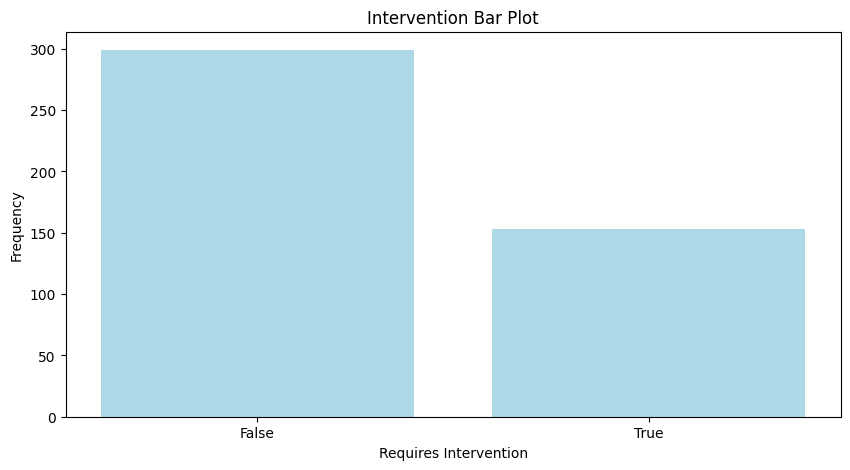

In [88]:
plt.figure(figsize=(15, 5))

# Count the occurrences of True and False
value_counts = in_df['intervention'].value_counts()
value_counts = (dict(value_counts)[False], dict(value_counts)[True])

# Create a bar plot with centered ticks
plt.figure(figsize=(10, 5))
bars = plt.bar([0, 1], value_counts, color=['lightblue', 'lightblue'], width=0.8)

# Set titles and labels
plt.title('Intervention Bar Plot')
plt.xlabel('Requires Intervention')
plt.ylabel('Frequency')

# Set custom x-axis tick labels and place them in the middle of the bars
plt.xticks([0, 1], ['False', 'True'], rotation=0)

# Adjust tick positions to ensure they are aligned to the center of bars
plt.gca().set_xticks([0, 1])

# Show plot
plt.show()

# plt.subplot(1, 2, 1)
# plt.boxplot(in_df['intervention'])
# plt.title('Intervation Box Plot')
# plt.ylabel('Patient Needs Intervation?')

# plt.tight_layout()
# plt.show()

In [74]:
with open("/media/masstorage/angiograms/patient_data.json", 'r') as file:
        patient_data = json.load(file)

with open("/media/masstorage/angiograms/exam_data.json", 'r') as file:
    clinical_data = json.load(file)

patient_ids = list(patient_data.keys())
exams = [exam for exam in clinical_data if exam["patient_id"] in patient_ids]

In [75]:
len(exams)

5706